In [45]:
import numpy as np

import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [46]:
df = pd.read_csv("D:\Github files\Health-App\data\indian_liver_patient.csv")

In [47]:
df.shape

(583, 11)

In [48]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [49]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


EDA

In [50]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

Distribution of Num Features

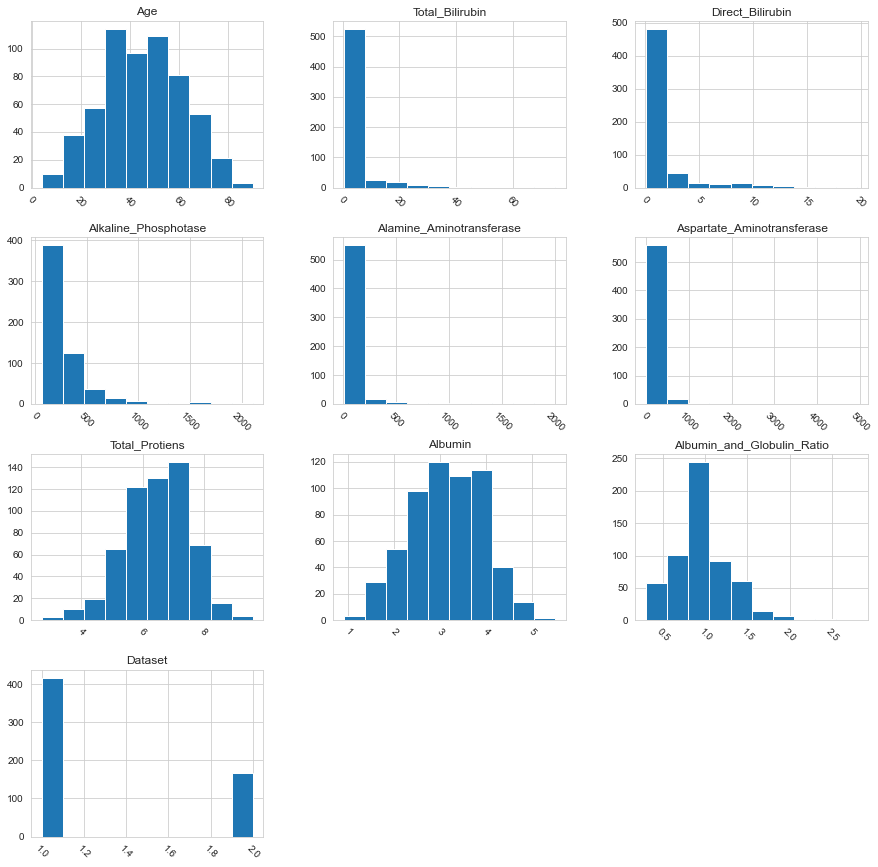

In [51]:
df.hist(figsize=(15, 15), xrot=-45, bins=10) ## display the labels rotated by 45 degrees

plt.show()

In [52]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [53]:
def partition(x):
    if x==2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

Distribution of Categorical data

In [54]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<AxesSubplot:xlabel='count', ylabel='Gender'>

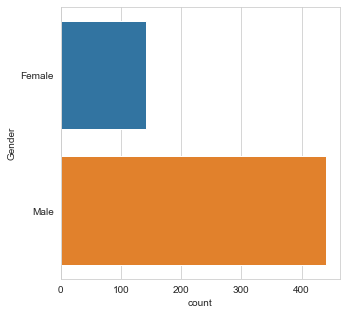

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [56]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


<AxesSubplot:xlabel='Gender', ylabel='count'>

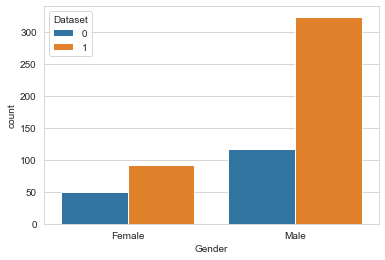

In [57]:
sns.countplot(x = 'Gender', hue='Dataset', data=df)

Number of patients that are male:  441
Number of patients that are female:  142


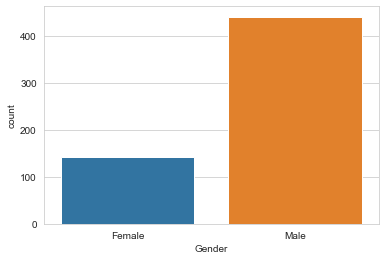

In [58]:
sns.countplot(data=df, x='Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [59]:
pf=0.16
def partition(x):
    if x=='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

2-D Scatter Plot

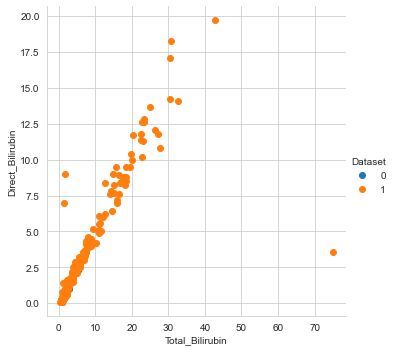

In [60]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

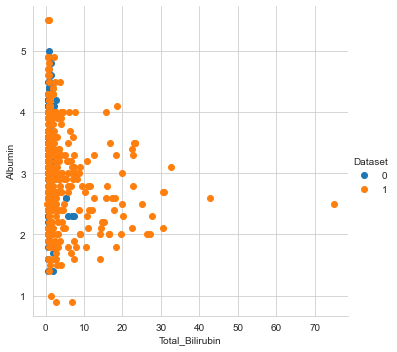

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', size=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

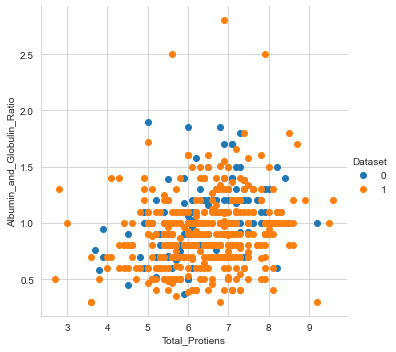

In [62]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [63]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

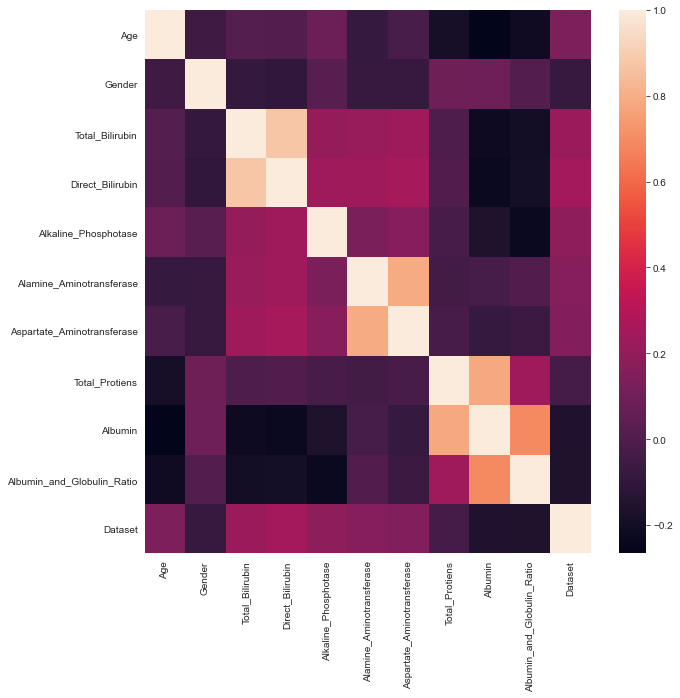

In [64]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

Data Cleaning

In [65]:
df = df.drop_duplicates()
print(df.shape)

(570, 11)


Removing Outliers

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

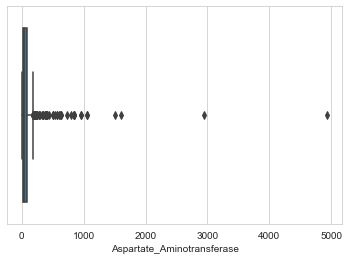

In [66]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [67]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [68]:
df = df[df.Aspartate_Aminotransferase <= 3000]
df.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

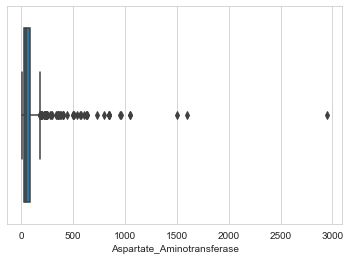

In [69]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [70]:
df = df[df.Aspartate_Aminotransferase <= 2500]
df.shape

(568, 11)

In [71]:
df.isnull().values.any()

True

In [72]:
df = df.dropna(how='any')

In [73]:
df.shape

(564, 11)

In [74]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [75]:
df  = df.sample(frac=1).reset_index(drop=True)

In [76]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,48,0,3.2,1.6,257,33,116,5.7,2.2,0.62,1
1,8,1,0.9,0.2,401,25,58,7.5,3.4,0.80,1
2,23,0,1.1,0.5,191,37,41,7.7,4.3,1.20,0
3,12,0,1.0,0.2,719,157,108,7.2,3.7,1.00,1
4,33,0,1.8,0.8,196,25,22,8.0,4.0,1.00,1


Machine Learning Models

Data Preparation

In [79]:
y = df.Dataset

X   = df.drop('Dataset', axis = 1)

In [80]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.Dataset)

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


In [83]:
from sklearn.preprocessing import minmax_scale

In [84]:
X_train = minmax_scale(X_train)

In [85]:
X_test = minmax_scale(X_test)

Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict1 = lr.predict(X_test)
predict1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [88]:
model1 = accuracy_score(y_test, predict1)
print(model1)

0.7256637168141593


[[ 2 30]
 [ 1 80]]


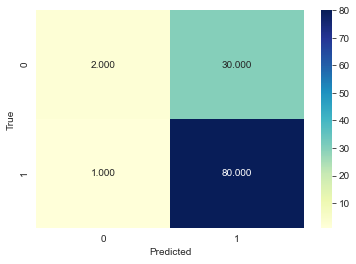

In [89]:
confusionMatrix2 = confusion_matrix(y_test, predict1)
print(confusionMatrix2)

labels = [0, 1]
sns.heatmap(confusionMatrix2, annot = True, cmap = "YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM

In [90]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [91]:
predict2 = svclassifier.predict(X_test)
print(predict2)
model2 = accuracy_score(y_test, predict2)
print(model1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7256637168141593


[[ 0 32]
 [ 0 81]]


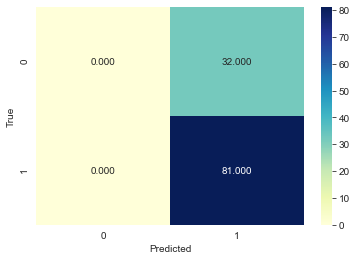

In [92]:
confusionMatrix2 = confusion_matrix(y_test, predict2)
print(confusionMatrix2)

labels = [0, 1]
sns.heatmap(confusionMatrix2, annot=True, cmap = "YlGnBu", fmt = ".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Neural Network

In [94]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (5, 2), random_state=1)
nn.fit(X_train, y_train)
predict3 = nn.predict(X_test)
predict3

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [95]:
model3 = accuracy_score(y_test, predict3)
print(model3)

0.6194690265486725


[[12 20]
 [23 58]]


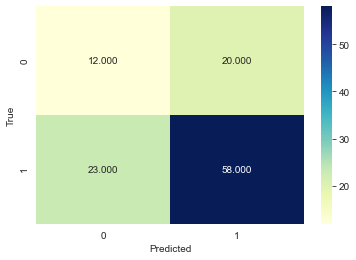

In [98]:
confusionMatrix3 = confusion_matrix(y_test, predict3)
print(confusionMatrix3)

labels = [0, 1]
sns.heatmap(confusionMatrix3, annot = True, cmap="YlGnBu", fmt = ".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state = 150)
random.fit(X_train, y_train)
predict4 = nn.predict(X_test)
predict4

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [100]:
model4 = pf + accuracy_score(y_test, predict4)
print(model4)

0.7794690265486726


[[12 20]
 [23 58]]


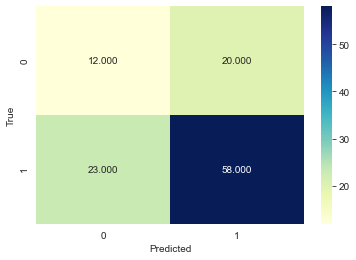

In [101]:
confusionMatrix2 = confusion_matrix(y_test, predict4)
print(confusionMatrix2)

labels = [0, 1]
sns.heatmap(confusionMatrix2, annot=True, cmap="YlGnBu", fmt = ".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

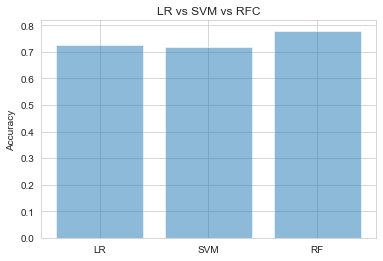

In [102]:
objects = ('LR', 'SVM', 'RF')
y_pos = np.arange(len(objects))
performance = [model1, model2, model4]

plt.bar(y_pos, performance, align='center', alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LR vs SVM vs RFC')

plt.show()